# Problem Statemen

client is an Insurance company that has provided Health Insurance to its customers now they need help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

In [1]:
import os
os.chdir("G:\\kaggle data set\\Health Insurance cross sell prediction")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Load Training Data

In [3]:
train = pd.read_csv("train.csv",index_col=0)
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0


In [4]:
train.shape

(381109, 11)

In [5]:
#Check Null Values

train.isnull().sum()


Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
# Descriptive Analysis

train.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Response (Target Feature)

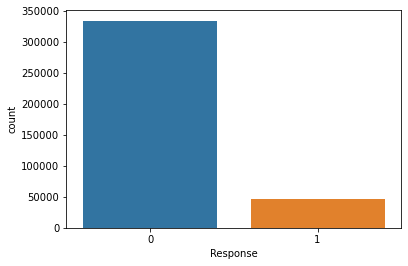

In [7]:
# Check Target Feature is Balanced or not.

plt.figure(figsize=(6,4))
sns.countplot(train["Response"])

In [8]:
train["Response"].value_counts()/381109*100
#Almost 88% Records belong to "0" class it's a class imbalanced Data but it's make sense usually not every person give Response to buy Insurance.

0    87.743664
1    12.256336
Name: Response, dtype: float64

Gender Feature

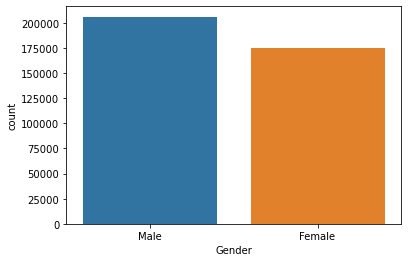

In [9]:
# Check How much Male and Female are present in Dataset.
plt.figure(figsize=(6,4))
sns.countplot(train["Gender"])

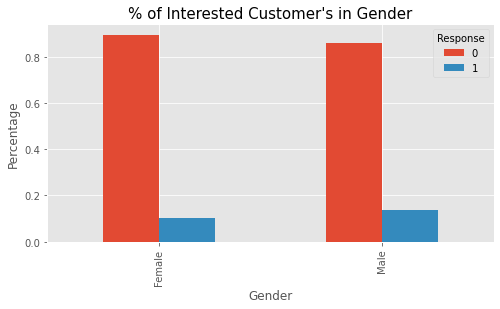

In [10]:
# Check How much of Male and Female are Interested in buy a Insurance.

crosstab = pd.crosstab(train["Gender"],train["Response"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(8,4))
plt.title("% of Interested Customer's in Gender",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

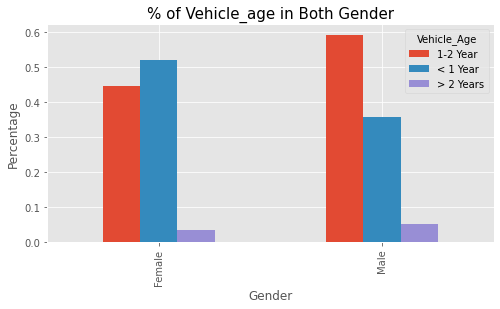

In [11]:
#Check Male or Female who use which Age of Vehicle.
crosstab = pd.crosstab(train["Gender"],train["Vehicle_Age"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(8,4))
plt.title("% of Vehicle_age in Both Gender",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

In [12]:
# Most of female's Vehicle_age is less than one year and Most of Male's Vehicle_age is between 1 to 2 years. 

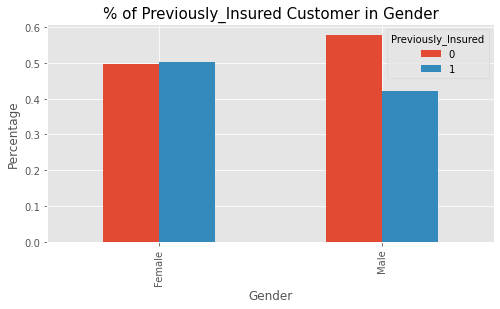

In [13]:
# Check Percentage of Previously_Insured Customers in Gender.
crosstab = pd.crosstab(train["Gender"],train["Previously_Insured"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(8,4))
plt.title("% of Previously_Insured Customer in Gender",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

As can see 50% of Female's are Previously_Insured But only 40% Male's are Previously_Insured. so company can do more focus on Male Customer's almots 60% of them don't have Insurance

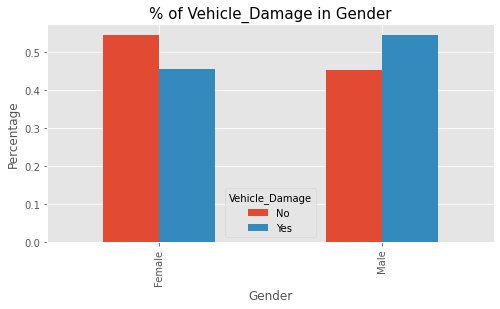

In [14]:
# Check Percentage of Vehicle_Damage by which Gender is more.
crosstab = pd.crosstab(train["Gender"],train["Vehicle_Damage"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(8,4))
plt.title("% of Vehicle_Damage in Gender",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

In [15]:
# Vehicle Damage by Male's is more in comparision of Female's.

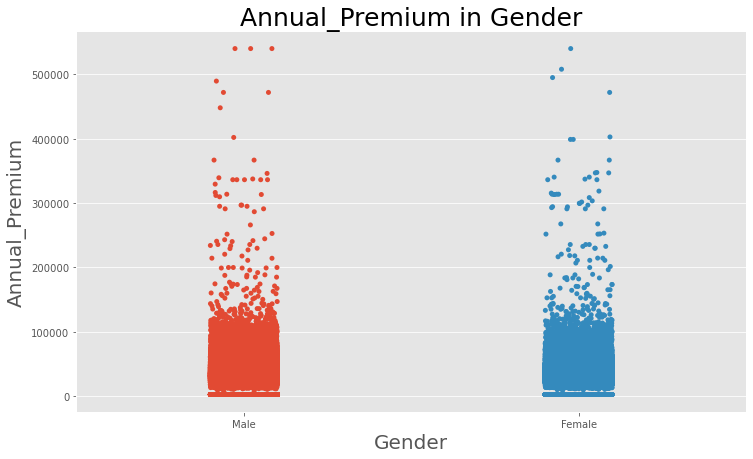

In [16]:
#Check which gender is paying more Annual_Premium.
plt.figure(figsize=(12,7))
sns.stripplot(train["Gender"],train["Annual_Premium"])
plt.title("Annual_Premium in Gender",fontsize=25)
plt.xlabel("Gender",fontsize=20)
plt.ylabel("Annual_Premium",fontsize=20)
plt.show()

In [17]:
# Both Gender Male and Female spending same Amount on Premium.

Age Feature

In [18]:
train["Age"].describe()

# In this Data Minimum Age customer is 20 year old and Maximum age is 85 year Old.

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

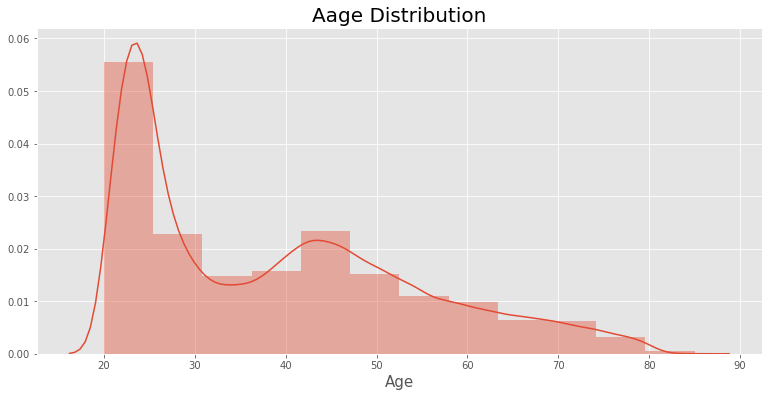

In [19]:
# Make Histogram of Age feature to check Ditribution.
plt.figure(figsize=(13,6))
sns.distplot(train["Age"],bins=12)
plt.title("Aage Distribution",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.show()

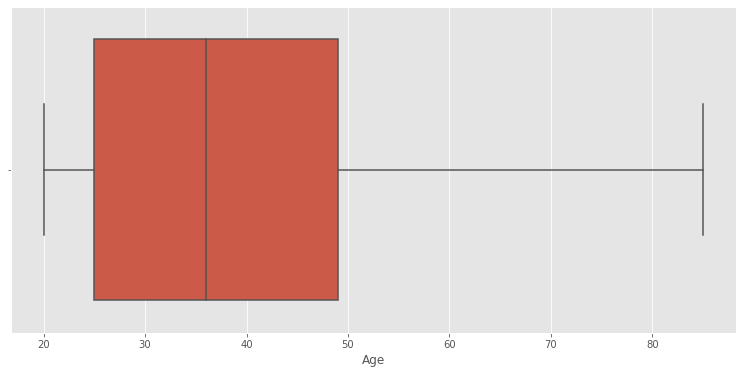

In [20]:
# Make boxplot for Age to check Outliers.
plt.figure(figsize=(13,6))
sns.boxplot(train["Age"])
plt.show()

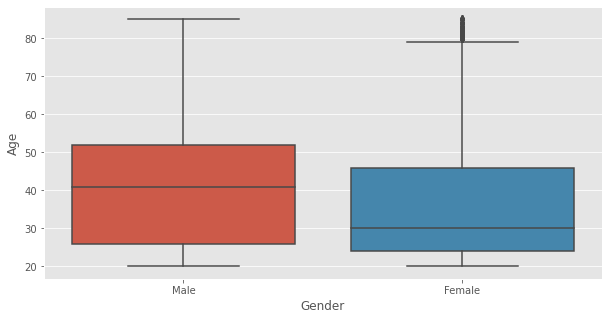

In [21]:
#Make boxplot for Age and Gender.

plt.figure(figsize=(10,5))
sns.boxplot('Gender',"Age",data=train)
plt.show()

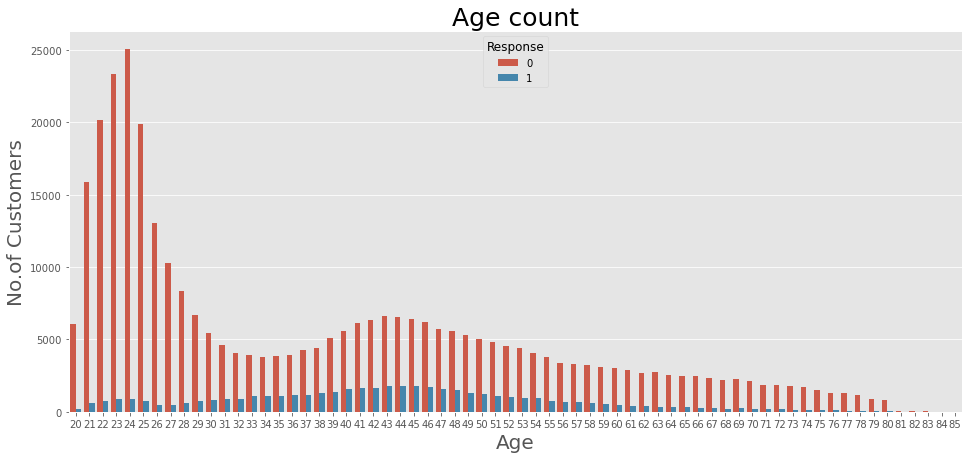

In [22]:
#Check which Age of Customer's has high presence in Dataset.
plt.figure(figsize=(16,7))
sns.countplot(x='Age', data=train, hue="Response")
plt.title("Age count",fontsize=25)
plt.xlabel("Age",fontsize=20)
plt.ylabel("No.of Customers",fontsize=20)
plt.show()

Largest portion of customers in the data are aged in their twenties. more than 25k customers are 24 year old and middle Age customers giving more Response so we can do more focus to them.

In [23]:
# Make a Groups of Age.

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['Age_group'] = pd.cut(train["Age"], bins, labels = labels)
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_group
id,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,40-49
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,70+
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,40-49
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,18-29
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,70+
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,18-29
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,18-29


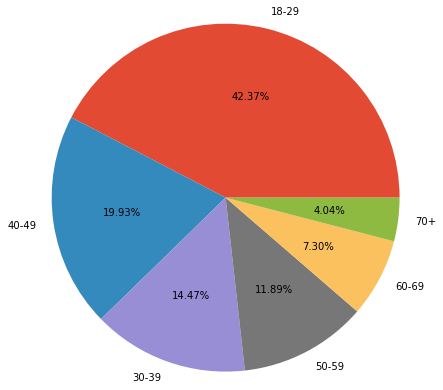

In [24]:
# Check Which Age_group has maximum numbers of records. 
slices = train['Age_group'].value_counts()/381109*100
age_group = ["18-29","40-49","30-39","50-59","60-69","70+"]
plt.pie(slices,labels=age_group,radius=2,autopct="%0.2f%%")
plt.show()

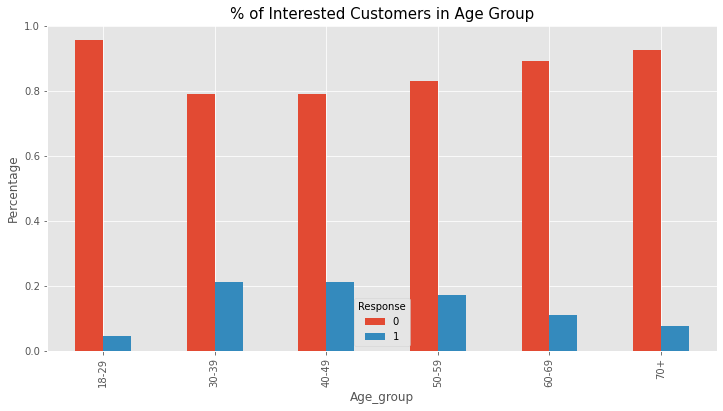

In [25]:
# Percentage of Interested Customers to buy Insurance in Age_group.

crosstab = pd.crosstab(train["Age_group"],train["Response"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(12,6))
plt.title("% of Interested Customers in Age Group",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

 30 to 60 Age Group Customers are more Interested to buy Insurance so we can focus to them.

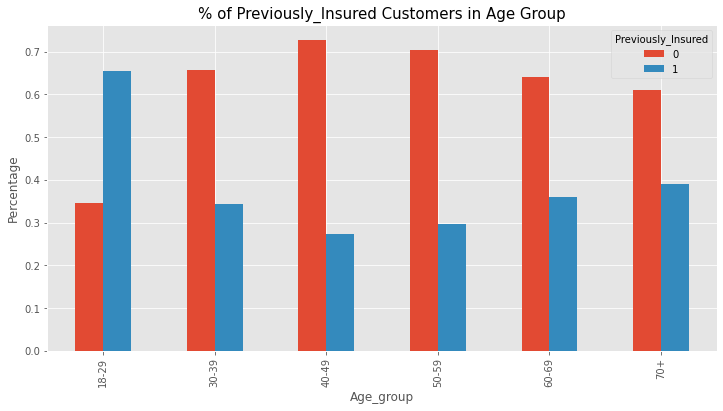

In [26]:
# Percentage of those Customer already has Vehicle Insurance in Age Group.
crosstab = pd.crosstab(train["Age_group"],train["Previously_Insured"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(12,6))
plt.title("% of Previously_Insured Customers in Age Group",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

More than 65% of Customers in Age_group 18-29 already has Vehicle Insurance and as we showed in previous graph 30-60 Age_group customer's are more Interested because they doesn't have Vehicle Insurance.

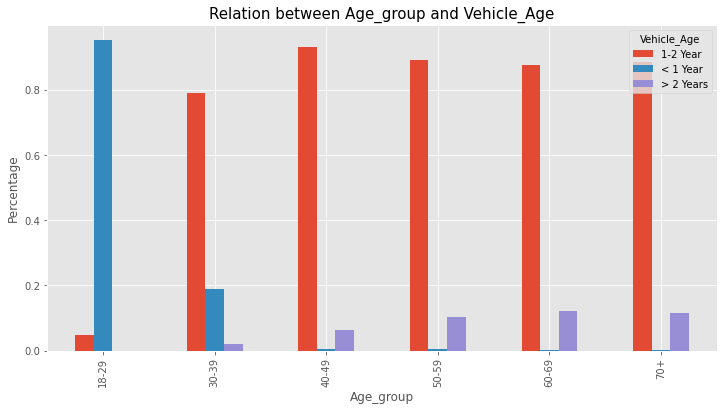

In [27]:
# Check which Age_group have Which Vehicle_Age Category
crosstab = pd.crosstab(train["Age_group"],train["Vehicle_Age"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(12,6))
plt.title("Relation between Age_group and Vehicle_Age",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

In [28]:
# More than 95% Customers in Age_group 18-29 has Vehicle_Age less than 1 year as Age is increasing Customers has old Vehicle.

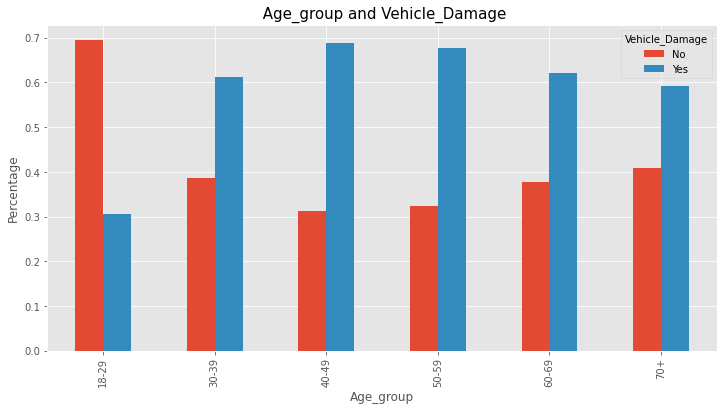

In [29]:
# Check which Age_group have done most Vehicle_Damage.
crosstab = pd.crosstab(train["Age_group"],train["Vehicle_Damage"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(12,6))
plt.title(" Age_group and Vehicle_Damage",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

In [30]:
# After 29 Age_Group Customer has done more Vehicle Damage may be because of Vehicle Age.

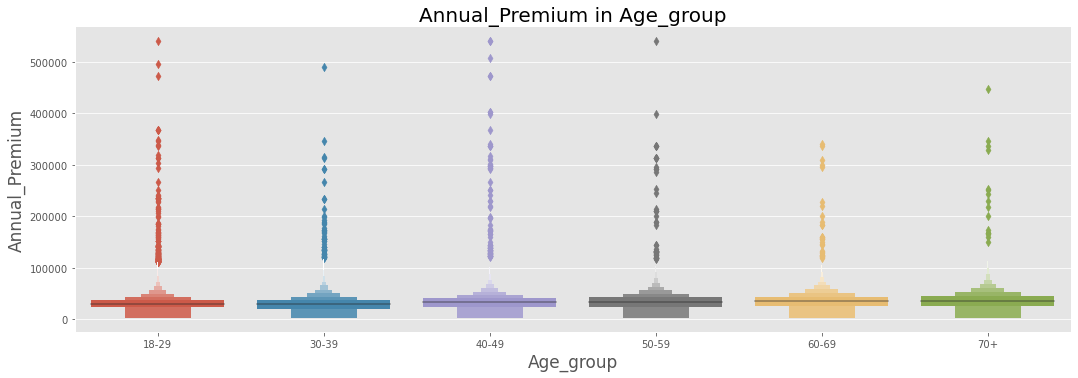

In [31]:
#Check which Age_group is paying more Annual_Premium.

sns.catplot(x="Age_group", y = "Annual_Premium",data=train.sort_values("Annual_Premium",ascending=False),kind="boxen",
            ci=30,aspect=3)
plt.title("Annual_Premium in Age_group",fontsize=20)
plt.xlabel("Age_group",fontsize=17)
plt.ylabel("Annual_Premium",fontsize=17)
plt.show()


# catplot like boxplot

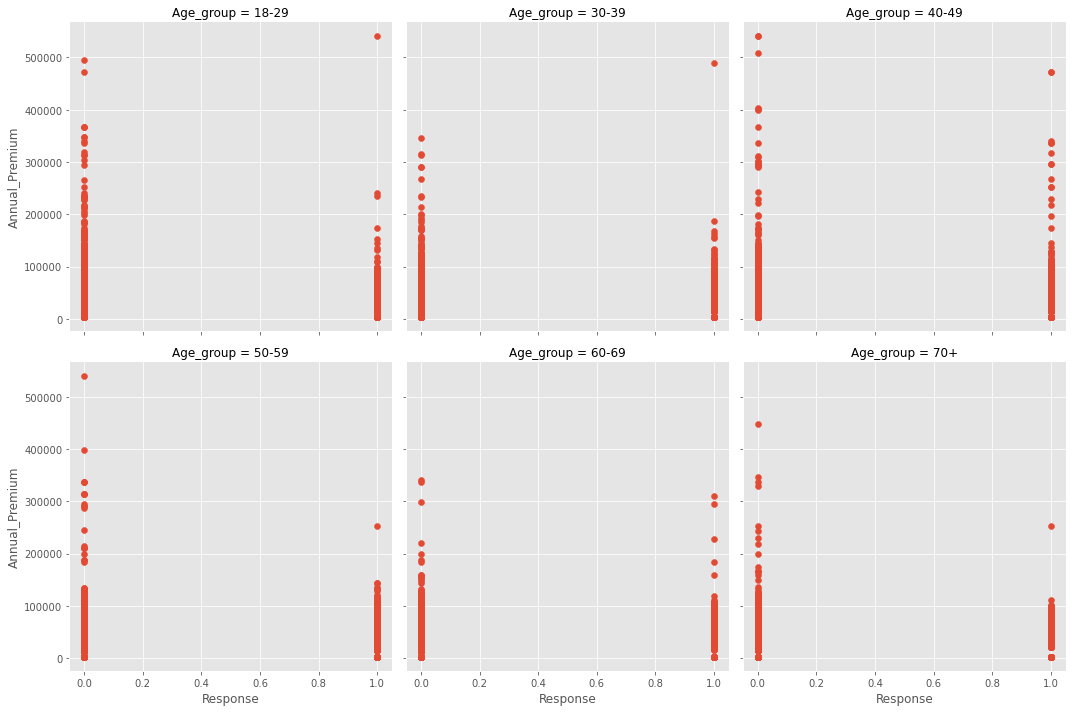

In [32]:
# Annual Premimum Seprately in each Age group with Response
fg = sns.FacetGrid(train,col="Age_group",col_wrap=3,height=5)
fg.map(plt.scatter,"Response","Annual_Premium")
plt.show()

Driving_License Feature

In [33]:
#Check How many of Customer has Driving_License

train["Driving_License"].value_counts()/len(train["Driving_License"])*100

1    99.786938
0     0.213062
Name: Driving_License, dtype: float64

In [34]:
# with out Driving_License Customers are very less in Dataset

Text(0.5, 1.0, 'Driving_License')

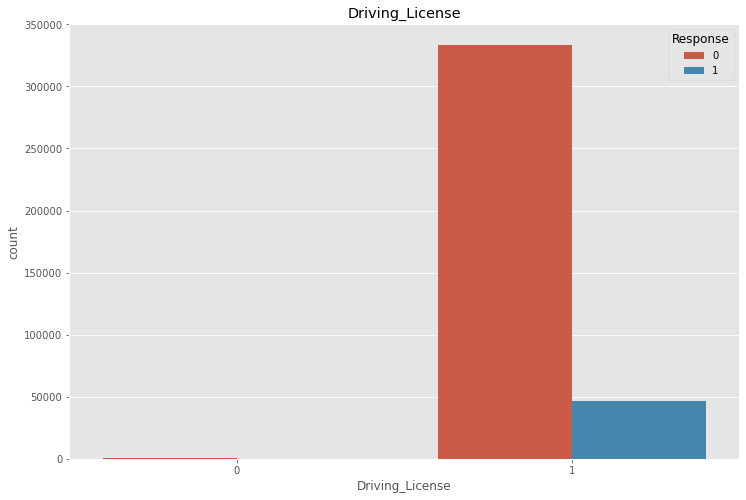

In [35]:
# Make plot how many of Customer has Driving_License and How many of them give's Response to buy Insurance

plt.figure(figsize=(12,8))
sns.countplot(x="Driving_License",data=train,hue="Response")
plt.title("Driving_License")

with out Driving_License Customers are very less in Dataset and they don't have Interest to buy Insurance so Company should focus just those customer's have Driving_License. 

Region_Code feature

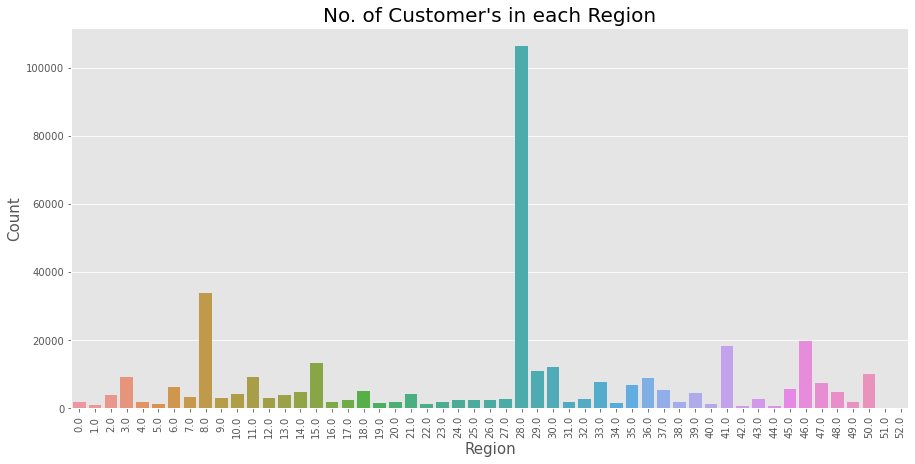

In [36]:
# Number of Customer's in each Region
plt.figure(figsize=(15,7))
sns.countplot(train["Region_Code"])
plt.title("No. of Customer's in each Region",fontsize=20 )
plt.ylabel("Count",fontsize=15 )
plt.xlabel("Region",fontsize=15 )
plt.xticks(rotation=90)
plt.show()

In [37]:
# As we can from 28 Region have Highest Number of Customer's.

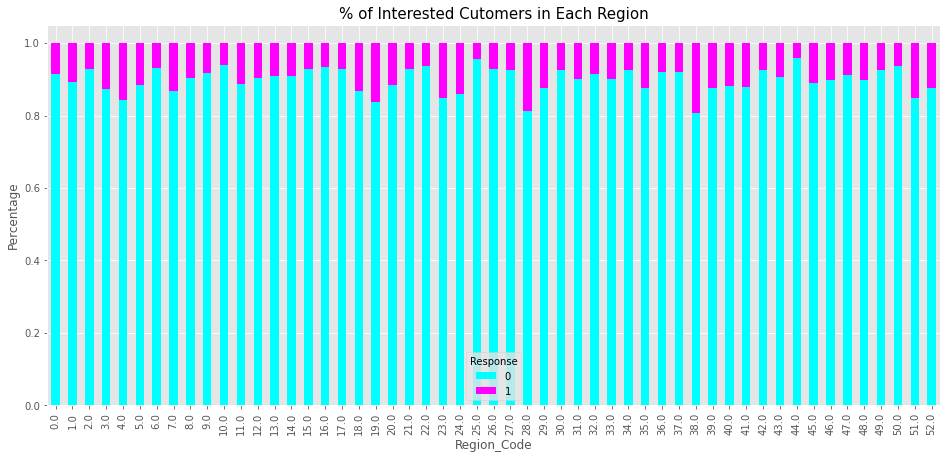

In [38]:
# Check from which Region Customer has more Interested to buy Insurance.
crosstab = pd.crosstab(train["Region_Code"],train["Response"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(16,7),stacked=True, color=["cyan","magenta"])
plt.title("% of Interested Cutomers in Each Region",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

In [39]:
# from some Region like 4,7,18,19,23,28,38 and 51 Percentage of Interested Customers is High.

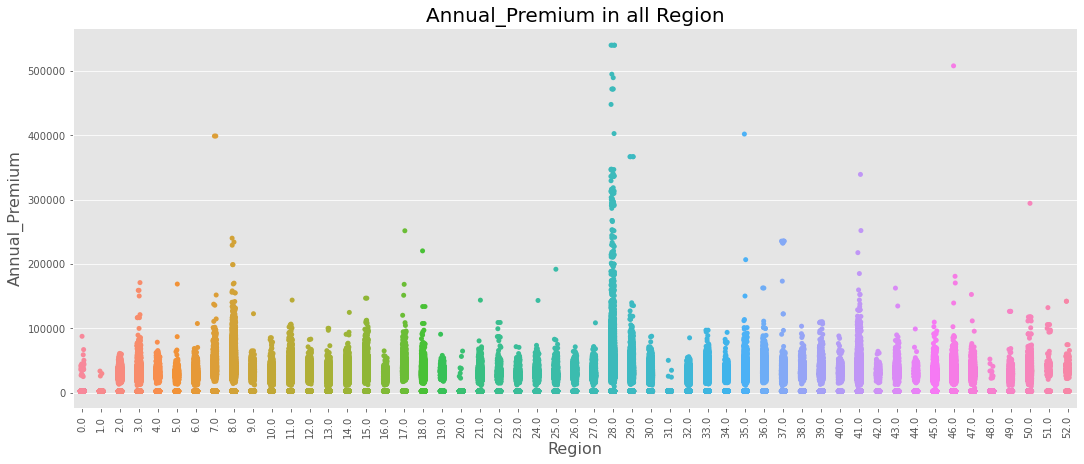

In [40]:
#Check which Region Customer is paying more Annual_Premium.
plt.figure(figsize=(18,7))
sns.stripplot(train["Region_Code"],train["Annual_Premium"])
plt.title("Annual_Premium in all Region",fontsize=20)
plt.xlabel("Region",fontsize=16)
plt.ylabel("Annual_Premium",fontsize=16)
plt.xticks(rotation=90)
plt.show()

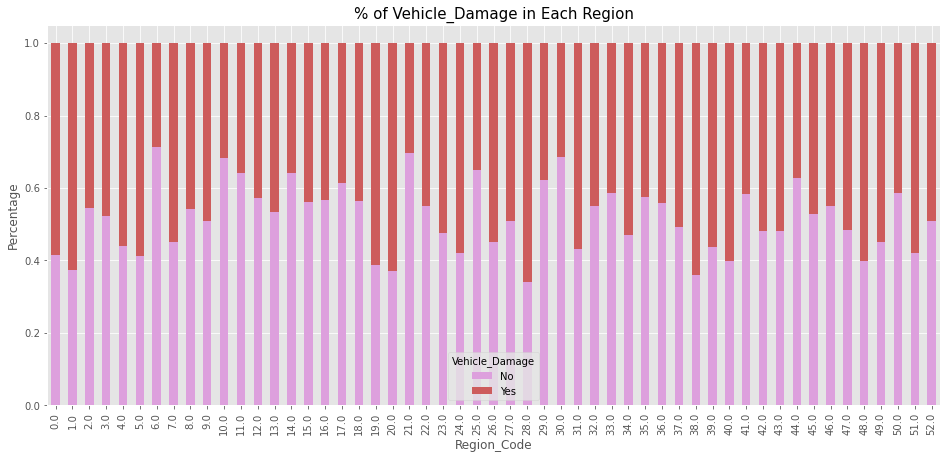

In [41]:
# Check from which Region Vehicle_Damage is more.

crosstab = pd.crosstab(train["Region_Code"],train["Vehicle_Damage"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(16,7),stacked=True, color=["plum","indianred"])
plt.title("% of Vehicle_Damage in Each Region",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()


In some Region Vehicle Damage is very High more than 60% like Region (1,19,20,28,38,40,48) as showed in Previous Graph from these Region Customers are More Interested to buy Insurance.

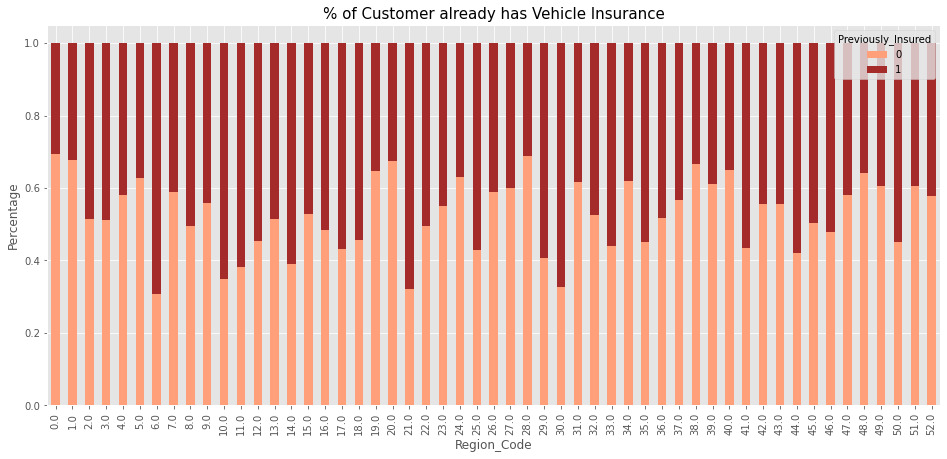

In [42]:
# Check from which Region Customer already has Vehicle Insurance.

crosstab = pd.crosstab(train["Region_Code"],train["Previously_Insured"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(16,7),stacked=True, color=["lightsalmon","brown"])
plt.title("% of Customer already has Vehicle Insurance",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()


In [43]:
# some Region like Region(10,11,14,21,30) More than 60% Customers has already Insurance.

Previously_Insured Feature

In [44]:
# Check How many of Customers already has Vehicle Insurance.
train["Previously_Insured"].value_counts()/len(train["Previously_Insured"])*100

0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64

In [45]:
#Almost 46% Of Customers already has Vehicle Insurance. 

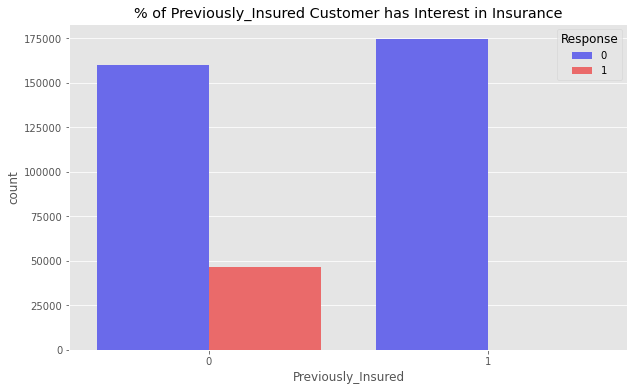

In [46]:
# Make plot how many of Customers already has Vehicle Insurance and how many of them are interested to buy Insurance.

plt.figure(figsize=(10,6))
sns.countplot(x="Previously_Insured", data=train, hue="Response",palette='seismic')
plt.title("% of Previously_Insured Customer has Interest in Insurance")
plt.show()

In [47]:
# it make sense those customer has already Insurance why they would show interest to buy Insurance. 

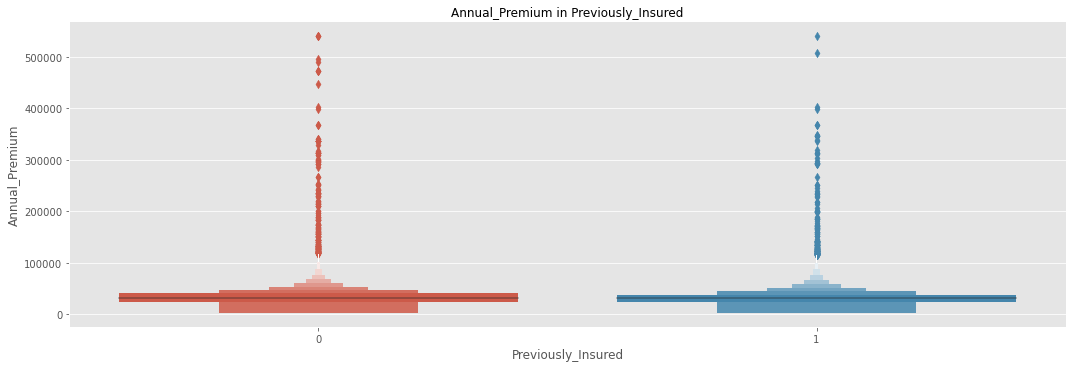

In [48]:
# How much Annual_Premium is paying by Previously_Insured

sns.catplot(x="Previously_Insured", y = "Annual_Premium",data=train.sort_values("Annual_Premium",ascending=False),kind="boxen",
            ci=30,aspect=3)
plt.title("Annual_Premium in Previously_Insured",fontsize=12)
plt.xlabel("Previously_Insured",fontsize=12)
plt.ylabel("Annual_Premium",fontsize=12)
plt.show()

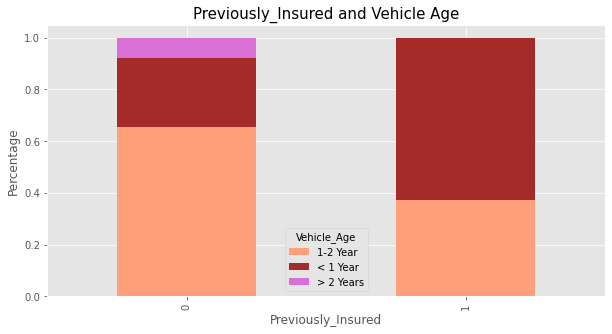

In [49]:
# Check what is the Vehicle Age of those already have Insurance.

crosstab = pd.crosstab(train["Previously_Insured"],train["Vehicle_Age"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(10,5),stacked=True, color=["lightsalmon","brown","orchid"])
plt.title("Previously_Insured and Vehicle Age",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

In [50]:
# If customers Vehicle_Age is greater than two years so company can focus on them because they don't have Insurance. 

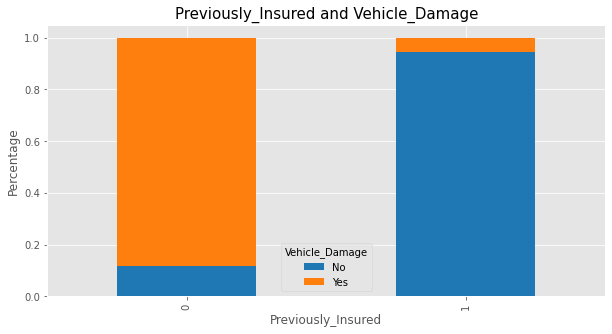

In [51]:
# Check Vehicle Damage is High or low for those have Previously_Insured

crosstab = pd.crosstab(train["Previously_Insured"],train["Vehicle_Damage"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(10,5),stacked=True, color=["tab:blue","tab:orange"])
plt.title("Previously_Insured and Vehicle_Damage",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()


As can see from upper graph those customers already has Insurance the Vehicle Damage is very low on the other side those customer doesn't have Vehicle Insurance Vehicle Damage is very High.

Vehicle_Age feature

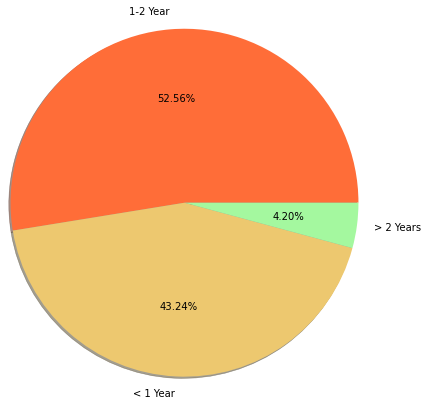

In [52]:
# Check How many unique values are present in Vehicle Age feature.

slices = train["Vehicle_Age"].value_counts()
age_group = ["1-2 Year","< 1 Year","> 2 Years"]
colors=sns.color_palette(palette='rainbow_r')
plt.pie(slices,labels=age_group,colors=colors,radius=2,autopct="%0.2f%%", shadow=True)
plt.show()

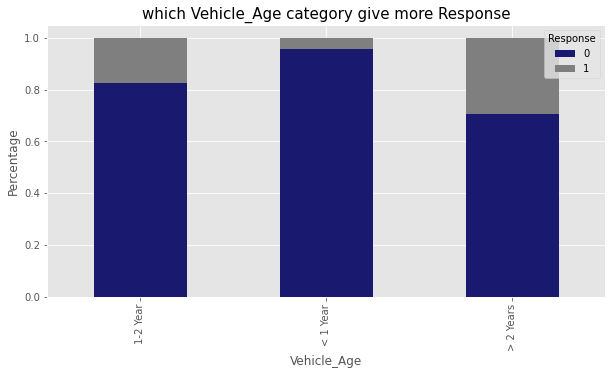

In [53]:
#Check Who give's more Response in Vehicle_Age Feature

crosstab = pd.crosstab(train["Vehicle_Age"],train["Response"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(10,5),stacked=True, color=["midnightblue","tab:gray"])
plt.title("which Vehicle_Age category give more Response",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

In [54]:
# As we can see more than 2 year Age_Vehicle Customers give's more Response incomparision of two other Vehicle Age category.

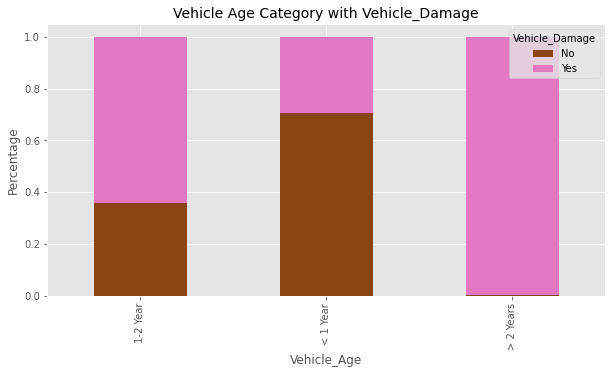

In [55]:
#Check which Vehicle Age Category has more Vehicle_Damage

crosstab = pd.crosstab(train["Vehicle_Age"],train["Vehicle_Damage"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(10,5),stacked=True, color=["saddlebrown","tab:pink"])
plt.title("Vehicle Age Category with Vehicle_Damage",fontsize=14)
plt.ylabel("Percentage",fontsize=12)
plt.show()


as can see if Vehicle_Age is getting increase than Vehicle_Damage is also increases.that's the reason customers are more interested to buy Insurance as Vehicle_Age Increases.

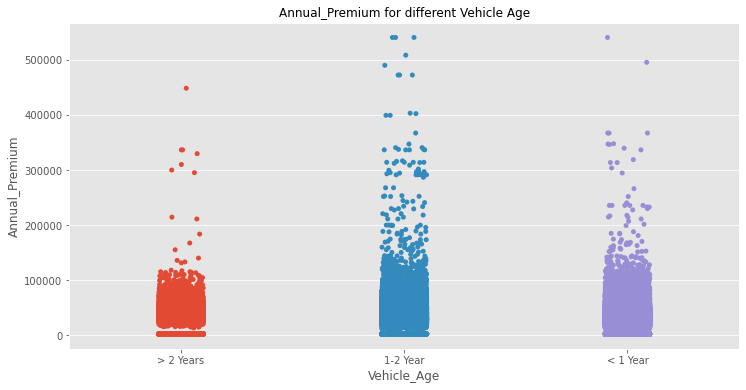

In [56]:
# How much Annual_Premium for different Vehicle Age.
plt.figure(figsize=(12,6))

sns.stripplot(x="Vehicle_Age", y = "Annual_Premium",data=train)
plt.title("Annual_Premium for different Vehicle Age",fontsize=12)
plt.xlabel("Vehicle_Age",fontsize=12)
plt.ylabel("Annual_Premium",fontsize=12)
plt.show()

Vehicle_Damage feature

In [57]:
train["Vehicle_Damage"].value_counts()/len(train["Vehicle_Damage"])*100

Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64

50.5% of Vehicle's are Damage and 49.5 of of Vehicle's are not Damage.

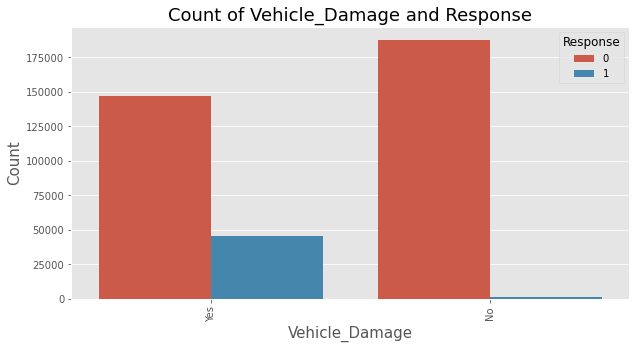

In [58]:
# Number of Customer's in each Region
plt.figure(figsize=(10,5))
sns.countplot(x="Vehicle_Damage",hue="Response",data=train)
plt.title("Count of Vehicle_Damage and Response",fontsize=18)
plt.ylabel("Count",fontsize=15 )
plt.xlabel("Vehicle_Damage",fontsize=15 )
plt.xticks(rotation=90)
plt.show()

In [59]:
# if Vehicle had faced Damage than Customers are more Interested to buy Insurance so company can focus these Customers.

Annual_Premium Feature

In [60]:
train["Annual_Premium"].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

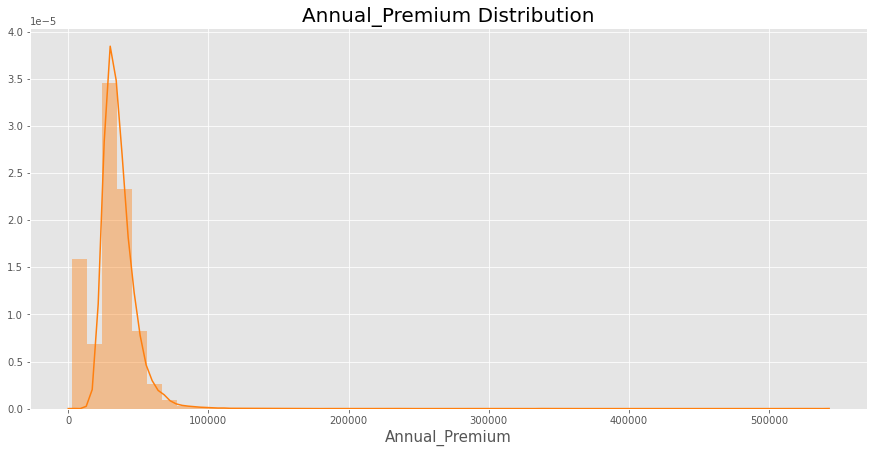

In [61]:
# Make Histogram of Annual_Premium to check Ditribution.

plt.figure(figsize=(15,7))
sns.distplot(train["Annual_Premium"],bins=50,color="tab:orange")
plt.title("Annual_Premium Distribution",fontsize=20)
plt.xlabel("Annual_Premium",fontsize=15)
plt.show()

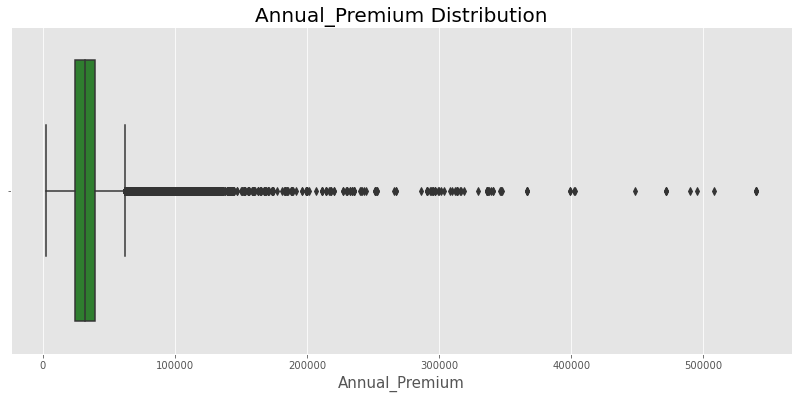

In [62]:
# Make boxplot and check Outlier's
plt.figure(figsize=(14,6))
sns.boxplot(train["Annual_Premium"],color="forestgreen")
plt.title("Annual_Premium Distribution",fontsize=20)
plt.xlabel("Annual_Premium",fontsize=15)
plt.show()

In [63]:
# Make a Groups of Annual_Premium.

bins = [0,50000,100000,150000, 200000,250000, 300000,350000, 400000,450000, 500000,550000, 600000]
labels = ['0-50000','50001-100000','100001-150000','150001-200000','200001-250000','250001-300000','300001-350000',
          '350001-400000','400001-450000','450001-500000', '500001-550000','550000+']
train['Annual_Premium_group'] = pd.cut(train["Annual_Premium"], bins, labels = labels)
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_group,Annual_Premium_group
id,,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,40-49,0-50000
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,70+,0-50000
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,40-49,0-50000
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,18-29,0-50000
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,18-29,0-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,70+,0-50000
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,18-29,0-50000
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,18-29,0-50000


In [64]:
train["Annual_Premium_group"].value_counts()

0-50000          348905
50001-100000      31426
100001-150000       587
150001-200000        79
200001-250000        36
300001-350000        32
250001-300000        25
350001-400000         6
500001-550000         5
450001-500000         5
400001-450000         3
550000+               0
Name: Annual_Premium_group, dtype: int64

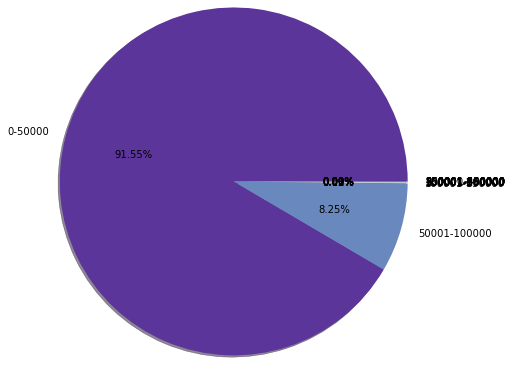

In [65]:
# Check How many unique values are present in Annual_Premium_group feature and what's the percentage of them in Annual_Premium_group

slices = train["Annual_Premium_group"].value_counts()
Annual_Premium_group =train["Annual_Premium_group"].value_counts().index
colors=sns.color_palette(palette='twilight_shifted')
plt.pie(slices,labels=Annual_Premium_group,colors=colors,radius=2,autopct="%0.2f%%", shadow=True)
plt.show()

In [66]:
# More than 91% Annual Premium Range between 0 to 50,000.

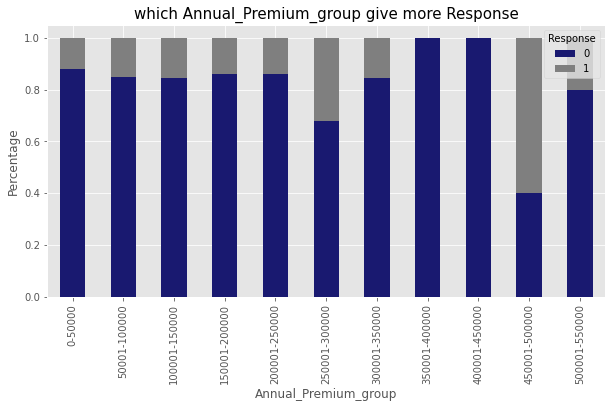

In [67]:
#Check which Annual_Premium_group cutomers are more Interested to buy Insurance.

crosstab = pd.crosstab(train["Annual_Premium_group"],train["Response"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(10,5),stacked=True, color=["midnightblue","tab:gray"])
plt.title("which Annual_Premium_group give more Response",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

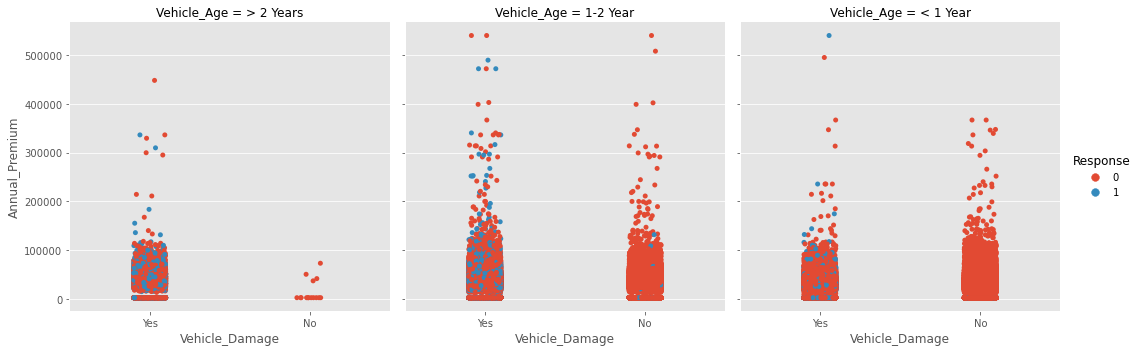

In [68]:
# Multivariable Analysis with Annual_Premium feature.
sns.catplot(x="Vehicle_Damage",y="Annual_Premium",hue="Response",col="Vehicle_Age",data=train,kind="strip")
plt.show()

Policy_Sales_Channel feature

In [69]:
#check how many unique values present in Policy_Sales_Channel.

print("All Unique Channel: ",train["Policy_Sales_Channel"].unique())

print("----------------------------------------------------------")
      
print("Total Policy_Sales_Channel: ",len(train["Policy_Sales_Channel"].unique()))

All Unique Channel:  [ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92. 111.
 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94. 132.
  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95. 123.
  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.  58.
  20.  76. 104.  87.  84. 137. 126.  68.  67. 101. 115.  57.  82.  79.
 112.  99.  70.   2.  34.  33.  74. 102. 149.  43.   6.  50. 144. 143.
  41.]
----------------------------------------------------------
Total Policy_Sales_Channel:  155


In [70]:
pd.set_option("display.max_rows",155)

In [71]:
All_channel = train["Policy_Sales_Channel"].value_counts()
All_channel

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
13.0       1865
25.0       1848
7.0        1598
8.0        1515
30.0       1410
55.0       1264
155.0      1234
11.0       1203
1.0        1074
52.0       1055
125.0      1026
15.0        888
29.0        843
12.0        783
120.0       769
24.0        750
31.0        631
14.0        622
153.0       607
61.0        579
16.0        523
3.0         523
60.0        517
4.0         509
158.0       492
23.0        422
22.0        332
150.0       312
10.0        264
19.0        222
136.0       185
147.0       184
109.0       175
145.0       174
9.0         169
18.0        167
91.0        158
116.0       154
37.0        152
21.0        148
139.0       143
128.0       137
42.0        132
59.0        127
138.0       124
131.0       121
127.0       110
140.0       107
113.0       104
119.0       103
44.0        101
135.0       101
54.0    

In [72]:
top_10_channel = All_channel.sort_values(ascending=False).head(10)
top_10_channel

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
Name: Policy_Sales_Channel, dtype: int64

In [73]:
top_10_channel/len(train["Policy_Sales_Channel"])*100

152.0    35.366260
26.0     20.912652
124.0    19.415705
160.0     5.714638
156.0     2.797362
122.0     2.605554
157.0     1.753829
154.0     1.572516
151.0     1.019393
163.0     0.759100
Name: Policy_Sales_Channel, dtype: float64

Policy_Sales_Channel 152,26,124,160,156,122,157,154,151,163 these are top 10 channel and covering more than 90% of customers so just focus on these channels.

In [74]:
#Select that top_10_channel from Dataframe.

top_10_channel_df = train[train["Policy_Sales_Channel"].isin(top_10_channel.index)]
top_10_channel_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_group,Annual_Premium_group
id,,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,40-49,0-50000
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,70+,0-50000
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,40-49,0-50000
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,18-29,0-50000
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,18-29,0-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,70+,0-50000
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,18-29,0-50000
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,18-29,0-50000


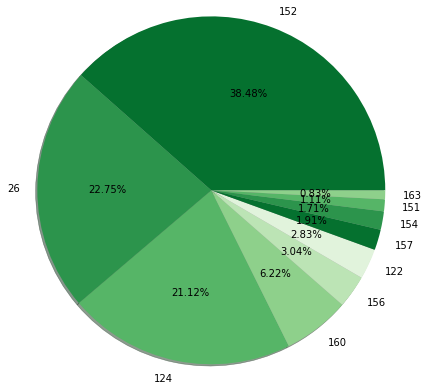

In [75]:
# top_10_channel_df

slices = top_10_channel_df["Policy_Sales_Channel"].value_counts()
Policy_Sales_Channel = ["152","26","124","160","156","122","157","154","151","163"]
colors=sns.color_palette(palette='Greens_r')
plt.pie(slices,labels=Policy_Sales_Channel,colors=colors,radius=2,autopct="%0.2f%%", shadow=True)
plt.show()

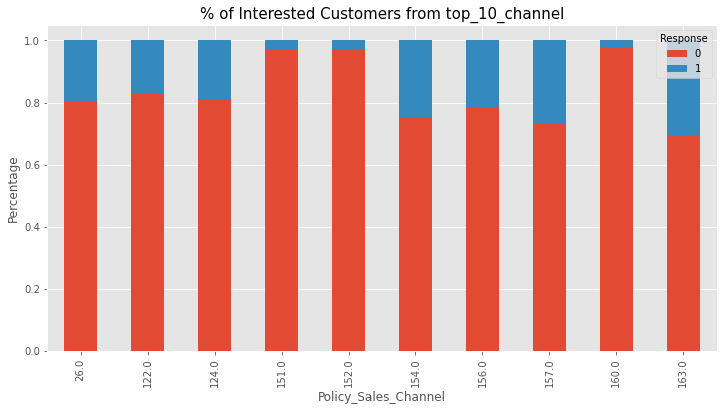

In [76]:
#Check what is the Response of Customers from these top_10_channel.
crosstab = pd.crosstab(top_10_channel_df["Policy_Sales_Channel"],top_10_channel_df["Response"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(12,6),stacked=True)
plt.title("% of Interested Customers from top_10_channel",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

Policy_Sales_Channel has Highest Numbers of Records but from this channel not so much Customers are Interested to buy Insurance. on the other side channel 163 has lowest number of records in top_10_channel but Response of customer is very High.

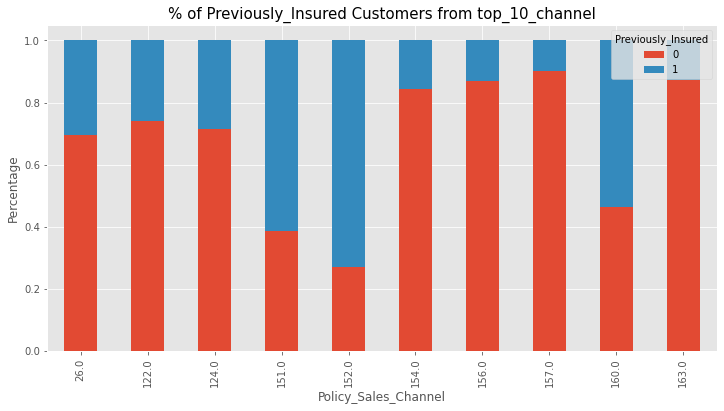

In [77]:
#Check what is the Response of Customers from these top_10_channel.
crosstab = pd.crosstab(top_10_channel_df["Policy_Sales_Channel"],top_10_channel_df["Previously_Insured"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(12,6),stacked=True)
plt.title("% of Previously_Insured Customers from top_10_channel",fontsize=15)
plt.ylabel("Percentage",fontsize=12)
plt.show()

In [78]:
# got the reason why Customer from channel 151,152 and 160 are not Interested because they have already Insurance.  

In [79]:
# Now Check Which Policy_Sales_Channel has a High Response rate.

all_response_df = train[train["Response"]==1]
all_response_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_group,Annual_Premium_group
id,,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,40-49,0-50000
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,40-49,0-50000
8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1,50-59,0-50000
11,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1,40-49,0-50000
16,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1,30-39,0-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381058,Male,40,1,46.0,0,1-2 Year,Yes,27508.0,26.0,189,1,30-39,0-50000
381062,Female,41,1,28.0,0,1-2 Year,Yes,37377.0,124.0,99,1,40-49,0-50000
381074,Female,46,1,28.0,0,1-2 Year,Yes,34741.0,124.0,167,1,40-49,0-50000


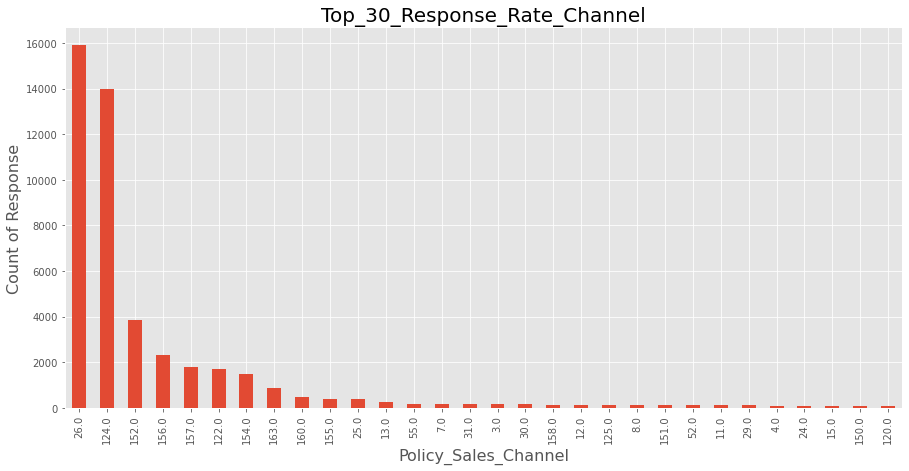

In [80]:
#top_30_response_rate_channel
all_response_df["Policy_Sales_Channel"].value_counts().head(30).plot(kind="bar",figsize=(15,7))
plt.title("Top_30_Response_Rate_Channel",fontsize=20)
plt.xlabel("Policy_Sales_Channel",fontsize=16)
plt.ylabel("Count of Response",fontsize=16)
plt.show()

from Policy Sales_channel 26 and 124 Response is very High.

Vintage feature

In [81]:
train["Vintage"].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

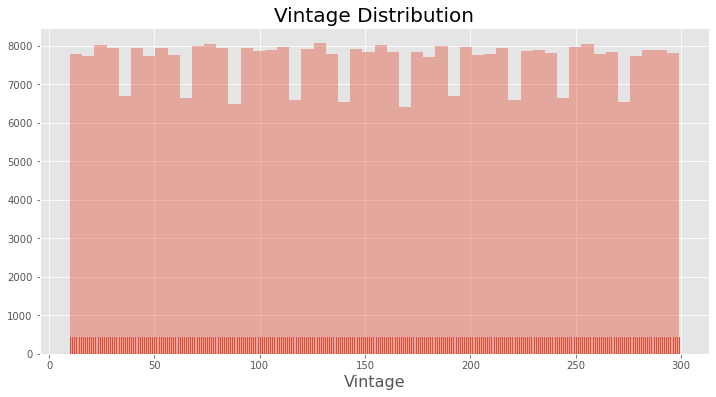

In [82]:
# Make Histogram to check the Distribution of Vintage feature.

plt.figure(figsize=(12,6))
sns.distplot(train["Vintage"], bins=50, kde=False, rug=True)
plt.title("Vintage Distribution",fontsize=20)
plt.xlabel("Vintage",fontsize=16)
plt.show()

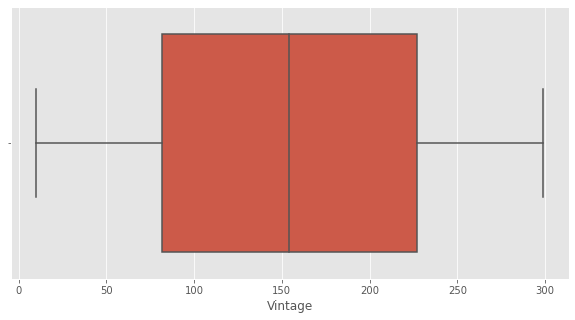

In [83]:
# Make Boxplot to check the outliers in Vintage feature.
plt.figure(figsize=(10,5))
sns.boxplot(train["Vintage"])
plt.show()

In [84]:
train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_group',
       'Annual_Premium_group'],
      dtype='object')

In [85]:
train = train.drop(['Age_group','Annual_Premium_group'],axis=1)
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0


# Load Test Data

In [86]:
test = pd.read_csv("test.csv",index_col=0)
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74


In [87]:
test.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [88]:
test.shape

(127037, 10)

# Concat Train and Test Dataset

In [89]:
df = pd.concat([train,test])
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...
508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN


In [90]:
df.isnull().sum()

Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [91]:
df.isnull().sum()

Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [92]:
#Change Vehicle_Age value's into Integer.

vhcl_age = {"> 2 Years":3,"1-2 Year":2,"< 1 Year":1}
df["Vehicle_Age"] = df["Vehicle_Age"].map(vhcl_age)

# Handle Outliers

Annual_Premium feature

In [93]:
df["Annual_Premium"].describe()

count    508146.000000
mean      30554.453041
std       17146.574625
min        2630.000000
25%       24381.000000
50%       31661.000000
75%       39403.750000
max      540165.000000
Name: Annual_Premium, dtype: float64

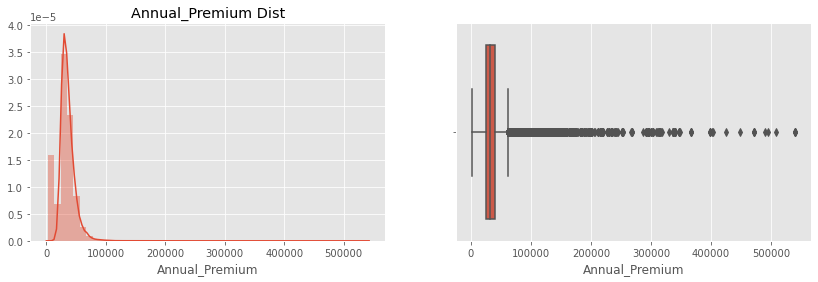

In [94]:
#Check Outlier's and Distribution by Histogram and boxplot in Annual_Premium.

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df["Annual_Premium"])
plt.title("Annual_Premium Dist")

plt.subplot(1,2,2)
sns.boxplot(df["Annual_Premium"])
plt.show()

Annual_Premium has lots of outliers. Annual_Premium distribution seems Normally Distributed so detect outlier's by (mean+-3*std).

In [95]:
#Annual_Premium has lots of outliers. Annual_Premium distribution seems Normally Distributed so detect outlier's by (mean+-3*std)

lower_boundary = df["Annual_Premium"].mean()-3*df["Annual_Premium"].std()
lower_boundary

-20885.27083298353

In [96]:
upper_boundary = df["Annual_Premium"].mean()+3*df["Annual_Premium"].std()
upper_boundary

81994.17691509379

In [97]:
#In Annual_Premium greater than 81994.176 value consider as outlier.

df.loc[df["Annual_Premium"]>81994.176,"Annual_Premium"]=81994.176

Age Feature

In [98]:
df["Age"].describe()

count    508146.000000
mean         38.808413
std          15.500179
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

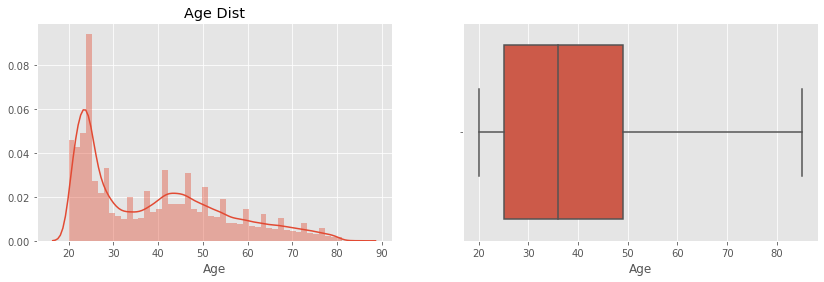

In [99]:
# Check Outlier's by boxplot in Age Feature.

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df["Age"])
plt.title("Age Dist")

plt.subplot(1,2,2)
sns.boxplot(df["Age"])
plt.show()

In [100]:
#Age feature not have Outliers.

 Vintage feature

In [101]:
df["Vintage"].describe()

count    508146.000000
mean        154.340123
std          83.668793
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

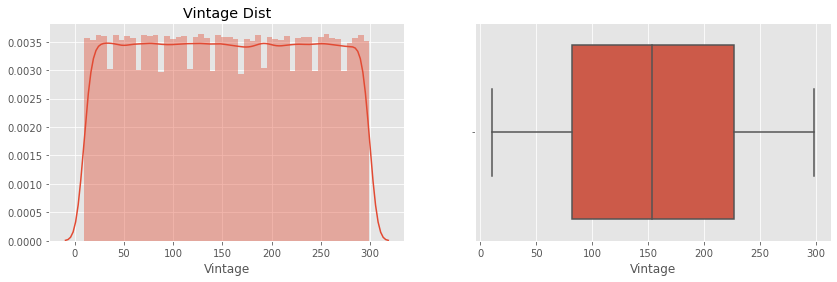

In [102]:
#Check Outlier's and Distribution by Histogram and boxplot in Vintage feature

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df["Vintage"])
plt.title("Vintage Dist")

plt.subplot(1,2,2)
sns.boxplot(df["Vintage"])
plt.show()

In [103]:
#Apply Probability Ratio Encoding to handle Region_Code  feature.


prob = df.groupby(["Region_Code"])["Response"].mean()

prob_df = pd.DataFrame(prob)

#find probability of Not Response.

prob_df["Not_Response"] = 1 - prob_df["Response"]

#probability ratio.

prob_df["Prob_Ratio"] = prob_df["Response"]/prob_df["Not_Response"]

df["Region_Code"] = df["Region_Code"].map(prob_df["Prob_Ratio"].to_dict())
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,0.230260,0,3,Yes,40454.0,26.0,217,1.0
2,Male,76,1,0.146344,0,2,No,33536.0,26.0,183,0.0
3,Male,47,1,0.230260,0,3,Yes,38294.0,26.0,27,1.0
4,Male,21,1,0.127091,1,1,No,28619.0,152.0,203,0.0
5,Female,29,1,0.138662,1,1,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...
508142,Female,26,1,0.086081,1,1,No,30867.0,152.0,56,NaN
508143,Female,38,1,0.230260,0,2,Yes,28700.0,122.0,165,NaN
508144,Male,21,1,0.114692,1,1,No,29802.0,152.0,74,NaN


In [104]:
# Apply Probability Ratio Encoding on Policy_Sales_Channel feature.

prob = df.groupby(["Policy_Sales_Channel"])["Response"].mean()

prob_df = pd.DataFrame(prob)

#find probability of Not Response.

prob_df["Not_Response"] = 1-prob_df["Response"]

#probability ratio.

prob_df["Prob_Ratio"] = prob_df["Response"]/prob_df["Not_Response"]

df["Policy_Sales_Channel"] = df["Policy_Sales_Channel"].map(prob_df["Prob_Ratio"].to_dict())

df["Policy_Sales_Channel"].unique()

array([0.2490401 , 0.02946703, 0.02229628, 0.23327055, 0.11270125,
       0.17295597, 0.12440191, 0.27462936, 0.43715847, 0.36687117,
       0.20950061, 0.09359606, 0.05732484, 0.0962963 , 0.32617836,
       0.09414226, 0.12234043, 0.47079857, 0.09863014, 0.03242094,
       0.14126808, 0.2494929 , 0.10707457, 0.03368624, 0.14285714,
       0.33970276, 0.3220339 , 0.15934066, 0.11422414, 0.08823529,
       0.42222222, 0.43681319, 0.1       , 0.20276498, 0.14382632,
       0.17581395, 0.12853107, 0.14545455, 0.07843137, 0.06304729,
       0.15      , 0.37815126, 0.16666667, 0.10526316, 0.08992806,
       0.23364486, 0.09232955, 0.07272727, 0.25061425, 0.24528302,
       0.        , 0.27586207, 0.15207373, 0.03726708, 0.22641509,
       0.05263158, 0.3       , 0.19047619, 0.12      , 0.13235294,
       0.2248062 , 0.175     , 0.11184211, 0.15231788, 0.22666667,
       0.24691358, 0.13636364, 0.10948905, 0.07      , 0.03846154,
       0.10483871, 0.13084112, 0.02      , 0.05102041, 0.09782

In [105]:
# Probability Encoding change some recors in infinity or nan so lets handle this.

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.isnull().sum()

Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         8
Vintage                      0
Response                127037
dtype: int64

In [106]:
#Fill Nan value in Policy_Sales_Channel buy mean
mean = df["Policy_Sales_Channel"].mean()

df["Policy_Sales_Channel"] = df["Policy_Sales_Channel"].fillna(mean)

In [107]:
# Now apply one hot encoding on Gender and Vehicle_Damage feature.

df = pd.get_dummies(df,drop_first=True)
df

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,,,
1,44,1,0.230260,0,3,40454.0,0.249040,217,1.0,1,1
2,76,1,0.146344,0,2,33536.0,0.249040,183,0.0,1,0
3,47,1,0.230260,0,3,38294.0,0.249040,27,1.0,1,1
4,21,1,0.127091,1,1,28619.0,0.029467,203,0.0,1,0
5,29,1,0.138662,1,1,27496.0,0.029467,39,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
508142,26,1,0.086081,1,1,30867.0,0.029467,56,NaN,0,0
508143,38,1,0.230260,0,2,28700.0,0.209501,165,NaN,0,1
508144,21,1,0.114692,1,1,29802.0,0.029467,74,NaN,1,0


# Train and Test Split

In [108]:
train = df.iloc[:381109,:]
train

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,,,
1,44,1,0.230260,0,3,40454.0,0.249040,217,1.0,1,1
2,76,1,0.146344,0,2,33536.0,0.249040,183,0.0,1,0
3,47,1,0.230260,0,3,38294.0,0.249040,27,1.0,1,1
4,21,1,0.127091,1,1,28619.0,0.029467,203,0.0,1,0
5,29,1,0.138662,1,1,27496.0,0.029467,39,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,74,1,0.077917,1,2,30170.0,0.249040,88,0.0,1,0
381106,30,1,0.086081,1,1,40016.0,0.029467,131,0.0,1,0
381107,21,1,0.079710,1,1,35118.0,0.022296,161,0.0,1,0


In [109]:
x_df = train.drop("Response",axis=1)
x_df

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,,
1,44,1,0.230260,0,3,40454.0,0.249040,217,1,1
2,76,1,0.146344,0,2,33536.0,0.249040,183,1,0
3,47,1,0.230260,0,3,38294.0,0.249040,27,1,1
4,21,1,0.127091,1,1,28619.0,0.029467,203,1,0
5,29,1,0.138662,1,1,27496.0,0.029467,39,0,0
...,...,...,...,...,...,...,...,...,...,...
381105,74,1,0.077917,1,2,30170.0,0.249040,88,1,0
381106,30,1,0.086081,1,1,40016.0,0.029467,131,1,0
381107,21,1,0.079710,1,1,35118.0,0.022296,161,1,0


In [110]:
# Take Dependent feature from Train dataset.

y_df = train["Response"]
y_df

id
1         1.0
2         0.0
3         1.0
4         0.0
5         0.0
         ... 
381105    0.0
381106    0.0
381107    0.0
381108    0.0
381109    0.0
Name: Response, Length: 381109, dtype: float64

In [111]:
test = df.iloc[381109:,:]
test = test.drop("Response",axis=1)
test

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,,
381110,25,1,0.127091,1,1,35786.0,0.029467,53,1,0
381111,40,1,0.230260,0,2,33762.0,0.128531,111,1,1
381112,47,1,0.230260,0,2,40050.0,0.233271,199,1,1
381113,24,1,0.079954,1,1,37356.0,0.029467,187,1,1
381114,27,1,0.230260,1,1,59097.0,0.029467,297,1,0
...,...,...,...,...,...,...,...,...,...,...
508142,26,1,0.086081,1,1,30867.0,0.029467,56,0,0
508143,38,1,0.230260,0,2,28700.0,0.209501,165,0,1
508144,21,1,0.114692,1,1,29802.0,0.029467,74,1,0


In [112]:
test.shape

(127037, 10)

# Feature Scaling

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
#Apply Feature Scaling on Train Dataset.

scaling = MinMaxScaler()
scaling_data = scaling.fit_transform(x_df)


x_df = pd.DataFrame(scaling_data,columns=x_df.columns)
x_df

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes
0,0.369231,1.0,0.962214,0.0,1.0,0.476588,0.498080,0.716263,1.0,1.0
1,0.861538,1.0,0.531988,0.0,0.5,0.389420,0.498080,0.598616,1.0,0.0
2,0.415385,1.0,0.962214,0.0,1.0,0.449372,0.498080,0.058824,1.0,1.0
3,0.015385,1.0,0.433276,1.0,0.0,0.327465,0.058934,0.667820,1.0,0.0
4,0.138462,1.0,0.492601,1.0,0.0,0.313315,0.058934,0.100346,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
381104,0.830769,1.0,0.181165,1.0,0.5,0.347008,0.498080,0.269896,1.0,0.0
381105,0.153846,1.0,0.223022,1.0,0.0,0.471069,0.058934,0.418685,1.0,0.0
381106,0.015385,1.0,0.190356,1.0,0.0,0.409353,0.044593,0.522491,1.0,0.0
381107,0.738462,1.0,0.290047,0.0,1.0,0.529042,0.466541,0.221453,0.0,1.0


In [115]:
# Similarly Apply Feature Scaling on test data.

scaling_test = scaling.transform(test)

test = pd.DataFrame(scaling_test,columns=test.columns)
test

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes
0,0.076923,1.0,0.433276,1.0,0.0,0.417770,0.058934,0.148789,1.0,0.0
1,0.307692,1.0,0.962214,0.0,0.5,0.392268,0.257062,0.349481,1.0,1.0
2,0.415385,1.0,0.962214,0.0,0.5,0.471497,0.466541,0.653979,1.0,1.0
3,0.061538,1.0,0.191610,1.0,0.0,0.437553,0.058934,0.612457,1.0,1.0
4,0.107692,1.0,0.962214,1.0,0.0,0.711492,0.058934,0.993080,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
127032,0.092308,1.0,0.223022,1.0,0.0,0.355790,0.058934,0.159170,0.0,0.0
127033,0.276923,1.0,0.962214,0.0,0.5,0.328486,0.419001,0.536332,0.0,1.0
127034,0.015385,1.0,0.369709,1.0,0.0,0.342371,0.058934,0.221453,1.0,0.0
127035,0.784615,1.0,0.962214,1.0,0.5,0.759096,0.498080,0.882353,1.0,0.0


In [116]:
# Target Class is Imbalanced so make it Balanced.

from imblearn.over_sampling import SMOTE

smote_sampling = SMOTE()

new_x_df,new_y_df = smote_sampling.fit_sample(x_df,y_df)

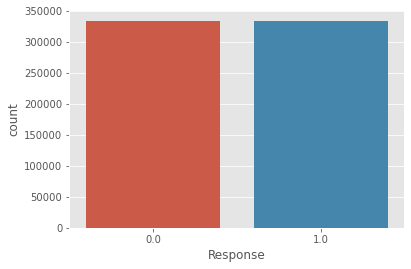

In [117]:
sns.countplot(new_y_df)

In [118]:
continous_feature = new_x_df[["Age","Vehicle_Age","Annual_Premium","Vintage"]]
continous_feature

,Age,Vehicle_Age,Annual_Premium,Vintage
0,0.369231,1.0,0.476588,0.716263
1,0.861538,0.5,0.389420,0.598616
2,0.415385,1.0,0.449372,0.058824
3,0.015385,0.0,0.327465,0.667820
4,0.138462,0.0,0.313315,0.100346
...,...,...,...,...
668793,0.245827,0.5,0.394943,0.505631
668794,0.385645,0.5,0.562612,0.424230
668795,0.400355,0.5,0.293841,0.854591
668796,0.295144,0.5,0.565885,0.543253


In [119]:
cont_feature_with_target = pd.concat([continous_feature,new_y_df],axis=1)
cont_feature_with_target

,Age,Vehicle_Age,Annual_Premium,Vintage,Response
0,0.369231,1.0,0.476588,0.716263,1.0
1,0.861538,0.5,0.389420,0.598616,0.0
2,0.415385,1.0,0.449372,0.058824,1.0
3,0.015385,0.0,0.327465,0.667820,0.0
4,0.138462,0.0,0.313315,0.100346,0.0
...,...,...,...,...,...
668793,0.245827,0.5,0.394943,0.505631,1.0
668794,0.385645,0.5,0.562612,0.424230,1.0
668795,0.400355,0.5,0.293841,0.854591,1.0
668796,0.295144,0.5,0.565885,0.543253,1.0


# Feature Selection

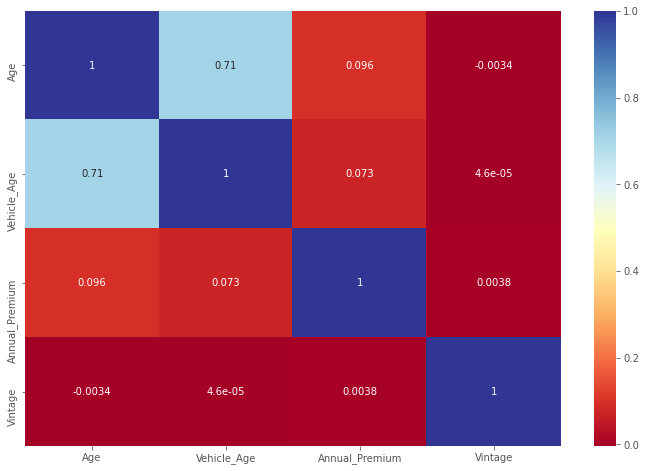

In [120]:
# First Check Correlation between Independent feature.

plt.figure(figsize=(12,8))
sns.heatmap(continous_feature.corr(),annot=True,cmap="RdYlBu")
plt.show()

In [121]:
# All Independent Continous Features are not Correlated with each other.

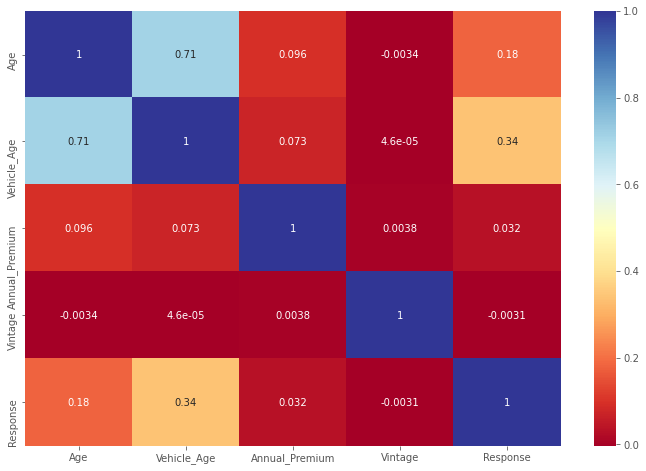

In [122]:
# Similarly Check Correlation between Independent and dependent features.

plt.figure(figsize=(12,8))
sns.heatmap(cont_feature_with_target.corr(),annot=True,cmap="RdYlBu")
plt.show()

In [123]:
# Vintage is not related with Target feature so drop this.

new_x_df = new_x_df.drop("Vintage",axis=1)
test = test.drop("Vintage",axis=1)

In [124]:
from sklearn.ensemble import ExtraTreesClassifier

In [125]:
selection_by_tree_model = ExtraTreesClassifier()
selection_by_tree_model.fit(new_x_df,new_y_df)

ExtraTreesClassifier()

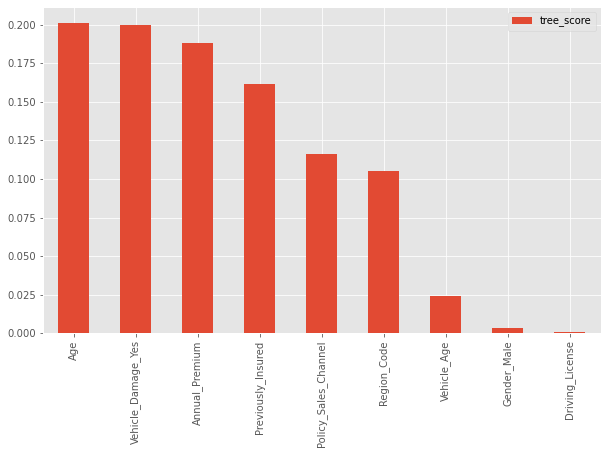

In [126]:
feature_ranked = pd.DataFrame(selection_by_tree_model.feature_importances_,index =new_x_df.columns,columns=["tree_score"])
feature_ranked.sort_values("tree_score",ascending=False).plot(kind="bar",figsize=(10,6))                        

In [127]:
new_x_df = new_x_df.drop(["Gender_Male","Driving_License"],axis=1)
test = test.drop(["Gender_Male","Driving_License"],axis=1)


In [128]:
# split training and validation data.

from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(new_x_df,new_y_df,test_size=0.3,random_state=23)

# Model Building 

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
import pickle 

Apply Random Forest Classifier

In [130]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

0.9908236108322404

In [131]:
# Prediction on validation data.

rf_prediction = rf_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,rf_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,rf_prediction))

Accuracy_Score:  0.8844198564593302
roc_auc_score:  0.8844214925873654


In [132]:
# Let's do hyperparameter tuning by Randomized Search CV on RandomForest Classifier

param = {"n_estimators":[50,100,200,250,300],"max_depth":[3,4,5,7,8,9,10,12],"min_samples_split":[2,3,4,5,6,7,8],
        "min_samples_leaf":[1,2,3,4,5,6,7],"max_features":["auto","log2"],"criterion":["gini","entropy"]}

rf_rdm_cv = RandomizedSearchCV(rf_model,param_distributions=param,cv=4,n_jobs=-1,verbose=12)
rf_rdm_cv.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 7, 8, 9, 10, 12],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [50, 100, 200, 250,
                                                         300]},
                   verbose=12)

In [133]:
print("Best_parameters:",rf_rdm_cv.best_params_)


print("Best_Score:",rf_rdm_cv.best_score_)

Best_parameters: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 12, 'criterion': 'gini'}
Best_Score: 0.8344127429201045


In [135]:
# save random forest model.

pickle_rf_file = open("rf_rdm_cv.pickle","wb")
pickle.dump(rf_rdm_cv,pickle_rf_file)
pickle_rf_file.close()

In [136]:
# Prediction on validation data.

rf_rdm_prediction = rf_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,rf_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,rf_rdm_prediction))

Accuracy_Score:  0.8334978070175438
roc_auc_score:  0.8336490800711219


In [166]:
rf_proba = rf_rdm_cv.predict_proba(x_valid)[:,1]

Text(33.0, 0.5, 'Actual Values')

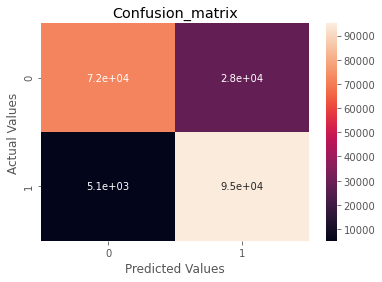

In [137]:
# Make Confusion matrix

sns.heatmap(confusion_matrix(y_valid,rf_rdm_prediction),annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [138]:
# print classification report
print(classification_report(y_valid,rf_rdm_prediction))

              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81    100452
         1.0       0.77      0.95      0.85    100188

    accuracy                           0.83    200640
   macro avg       0.85      0.83      0.83    200640
weighted avg       0.85      0.83      0.83    200640



Apply GardientBoosting Classifier

In [139]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
gb_model.score(x_train,y_train)

0.8342397224868527

In [140]:
# Prediction on validation data.

gb_prediction = gb_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,gb_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,gb_prediction))

Accuracy_Score:  0.8339413875598086
roc_auc_score:  0.8340918678665973


In [ ]:
# Let's do hyperparameter tuning by Randomized Search CV on GradientBoosting Classifier

param={"n_estimators":[50,100,200,250,300],"learning_rate":[0.01,0.1,0.3,0.5,0.7],
       "min_samples_split":[2,4,5,7],"max_depth":[3,5,7,9,12]}

gb_rdm_cv = RandomizedSearchCV(gb_model,param_distributions=param,cv=4,n_jobs=-1,verbose=5)
gb_rdm_cv.fit(x_train,y_train)

In [ ]:
print("Best_parameters:",gb_rdm_cv.best_params_)


print("Best_Score:",gb_rdm_cv.best_score_)

In [ ]:
# Save GB Model
pickle_gb_file = open("gb_rdm_cv.pickle","wb")
pickle.dump(gb_rdm_cv,pickle_gb_file)
pickle_gb_file.close()

In [141]:
# Model Builded before so now just call it.

gb_rdm_cv = pickle.load(open("gb_rdm_cv.pickle","rb"))


In [142]:
# Prediction on validation data.

gb_rdm_prediction = gb_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,gb_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,gb_rdm_prediction))

Accuracy_Score:  0.9071521132376396
roc_auc_score:  0.9071214644720226


In [165]:
gb_proba = gb_rdm_cv.predict_proba(x_valid)[:,1]

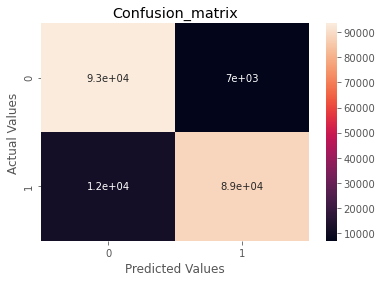

In [143]:
# Make Confusion matrix

sns.heatmap(confusion_matrix(y_valid,gb_rdm_prediction),annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [144]:
# print classification report
print(classification_report(y_valid,gb_rdm_prediction))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91    100452
         1.0       0.93      0.88      0.90    100188

    accuracy                           0.91    200640
   macro avg       0.91      0.91      0.91    200640
weighted avg       0.91      0.91      0.91    200640



Apply XGB Classifier

In [145]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)

0.9050256537322869

In [146]:
# Prediction on validation data.

xgb_prediction = xgb_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,xgb_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,xgb_prediction))

Accuracy_Score:  0.9026614832535885
roc_auc_score:  0.9026465330592416


In [ ]:
# Let's do hyperparameter tuning by Randomized Search CV on XGB Classifier

param = {"n_estimators":[50,100,200,300],"learning_rate":[0.001,0.1,0.5,0.7],"gamma":[0.01,0.1,1,10,100],
         "reg_lambda":[1,10,100,500,1000],"max_depth":[3,5,8,12,15]}

xgb_rdm_cv = RandomizedSearchCV(xgb_model,param_distributions=param,cv=5,n_jobs=-1,verbose=5)
xgb_rdm_cv.fit(x_train,y_train)

In [ ]:
print("Best_parameters:",xgb_rdm_cv.best_params_)


print("Best_Score:",xgb_rdm_cv.best_score_)

In [ ]:
# Save Model
xgb_pickle_file = open("xgb_rdm_cv.pickle","wb")
pickle.dump(xgb_rdm_cv,xgb_pickle_file)
xgb_pickle_file.close()

In [147]:
# Call Saved Model

xgb_rdm_cv = pickle.load(open("xgb_rdm_cv.pickle","rb"))


In [148]:
# Prediction on validation data.

xgb_rdm_prediction = xgb_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,xgb_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,xgb_rdm_prediction))

Accuracy_Score:  0.9049740829346092
roc_auc_score:  0.9049451157972815


In [164]:
xgb_proba = xgb_rdm_cv.predict_proba(x_valid)[:,1]

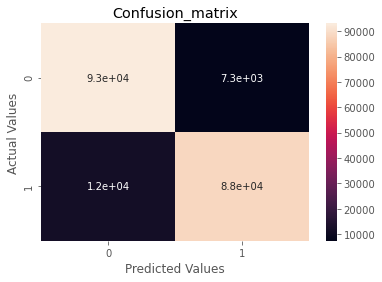

In [149]:
# Make Confusion matrix

sns.heatmap(confusion_matrix(y_valid,xgb_rdm_prediction),annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [150]:
# print classification report
print(classification_report(y_valid,xgb_rdm_prediction))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91    100452
         1.0       0.92      0.88      0.90    100188

    accuracy                           0.90    200640
   macro avg       0.91      0.90      0.90    200640
weighted avg       0.91      0.90      0.90    200640



Apply DecisionTree Classifier

In [151]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_model.score(x_train,y_train)

0.9908428351112232

In [152]:
# Prediction on validation data.

dt_prediction = dt_model.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,dt_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,dt_prediction))

Accuracy_Score:  0.8792763157894737
roc_auc_score:  0.8792701521402575


In [153]:
# Let's do hyperparameter tuning by Randomized Search CV on DecisionTree Classifier

param = {"max_depth":[3,4,5,7,8,9,10,12],"min_samples_split":[2,3,4,5,6,7,8],
        "min_samples_leaf":[1,2,3,4,5,6,7],"max_features":["auto","log2","sqrt"],"criterion":["gini","entropy"]}

dt_rdm_cv = RandomizedSearchCV(dt_model,param_distributions=param,n_iter=12,cv=5,n_jobs=-1,verbose=12)
dt_rdm_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 7, 8, 9, 10, 12],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8]},
                   verbose=12)

In [154]:
print("Best_parameters:",dt_rdm_cv.best_params_)


print("Best_Score:",dt_rdm_cv.best_score_)

Best_parameters: {'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 12, 'criterion': 'gini'}
Best_Score: 0.8159318036306524


In [155]:
# Save Model
dt_pickle_file = open("dt_rdm_cv.pickle","wb")
pickle.dump(dt_rdm_cv,dt_pickle_file)
dt_pickle_file.close()

In [156]:
# Prediction on validation data.

dt_rdm_prediction = dt_rdm_cv.predict(x_valid)
print("Accuracy_Score: ",accuracy_score(y_valid,dt_rdm_prediction))
print("roc_auc_score: ",roc_auc_score(y_valid,dt_rdm_prediction))

Accuracy_Score:  0.8188297448165869
roc_auc_score:  0.8189586494604335


In [167]:
dt_proba = dt_rdm_cv.predict_proba(x_valid)[:,1]

In [157]:
# print classification report
print(classification_report(y_valid,dt_rdm_prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80    100452
         1.0       0.77      0.92      0.83    100188

    accuracy                           0.82    200640
   macro avg       0.83      0.82      0.82    200640
weighted avg       0.83      0.82      0.82    200640



In [170]:
# Now make ROC_CURVE for all Models 

rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_valid,rf_proba)
gb_fpr,gb_tpr,gb_thresholds = roc_curve(y_valid,gb_proba)
xgb_fpr,xgb_tpr,xgb_thresholds = roc_curve(y_valid,xgb_proba)
dt_fpr,dt_tpr,dt_thresholds = roc_curve(y_valid,dt_proba)

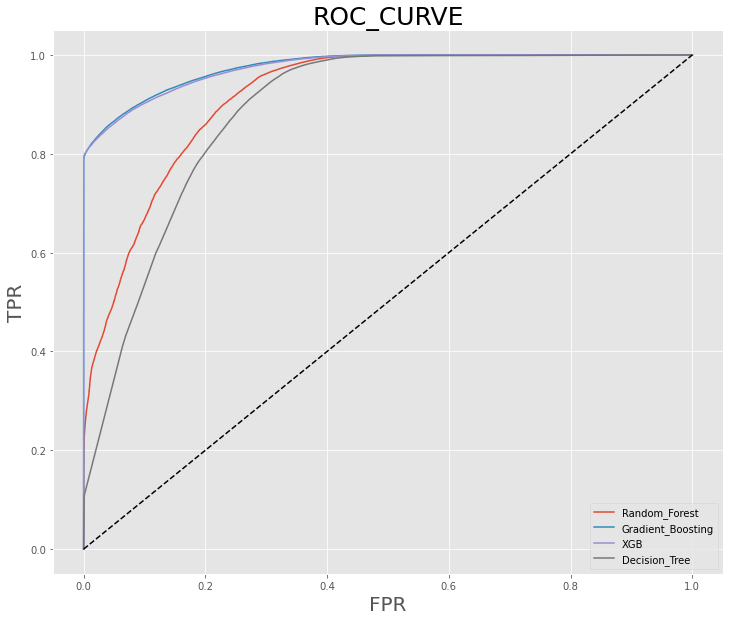

In [176]:
from matplotlib import style
style.use("ggplot")

plt.figure(figsize=(12,10))

plt.plot(rf_fpr,rf_tpr,label="Random_Forest")
plt.plot(gb_fpr,gb_tpr,label="Gradient_Boosting")
plt.plot(xgb_fpr,xgb_tpr,label="XGB")
plt.plot(dt_fpr,dt_tpr,label="Decision_Tree")
plt.plot([0,1],ls="dashed",color="black")

plt.legend()
plt.title("ROC_CURVE",fontsize=25)
plt.xlabel("FPR",fontsize=20)
plt.ylabel("TPR",fontsize=20)
plt.show()

In [ ]:
#Gradient_Boosting Model Area Under the Curve is maximum so choose it for Future Data Prediction.

# Prediction on Test Data.

In [180]:
test_pred = gb_rdm_cv.predict(test)
test_pred = pd.DataFrame(test_pred)
test_pred

In [184]:
submission_file = pd.read_csv("sample_submission.csv")

pred_file = pd.concat([submission_file["id"],test_pred],axis=1)
pred_file.columns = ["id","Response"]
pred_file.to_csv("Insurance_out_put.csv")


# Conclusion

- Customers with out Driving License have no chance of buying Insurance.
- Customers of age between 30 to 60 are more likely to buy insurance.
- Customers with Vehicle_Damage are likely to buy insurance.
- The variable such as Age, Previously_insured, Annual_premium and Vehicle_Damage are more afecting the target variable.